In [98]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoMinorLocator

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [69]:
orange = ["#ffac00"]
darkorange = ["#662089"]
blue = ["#1B4882"]
green = ["#086361"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [70]:
Pq_half_file = h5py.File("../data/processed_data/Pq_halffill_Lx8_Ly8_Checkerboard_beta18.0_L180.jld", "r")
Pq2_half_file = h5py.File("../data/processed_data/Pq2_halffill_Lx8_Ly8_Checkerboard_beta18.0_L180.jld", "r")
Pq_quarter_file = h5py.File("../data/processed_data/Pq_quarfill_Lx8_Ly8_Checkerboard_beta18.0_L180.jld", "r")

Pn_half_avg = Pq_half_file['Pn_avg'][:]
Pn_half_err = Pq_half_file['Pn_err'][:]
Pn2_half_avg = Pq2_half_file['Pn2_avg'][:]
Pn2_half_err = Pq2_half_file['Pn2_err'][:]
Pn_quarter_avg = Pq_quarter_file['Pn_avg'][:]
Pn_quarter_err = Pq_quarter_file['Pn_err'][:]

In [71]:
mpl.rc('font', size=12)  # adjust the font size globally

Text(0, 0.5, '$P_{n,2}$')

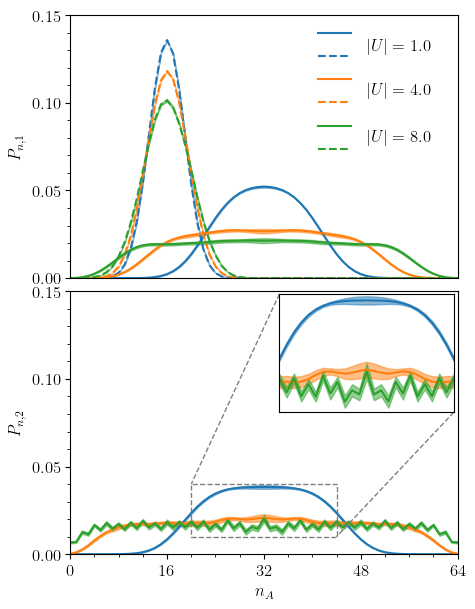

In [116]:
fig = plt.figure(figsize=(5, 7))
gs = gridspec.GridSpec(2, 1, hspace=0.05)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(
    range(65), Pn_half_avg[0,:], label=" "
)
ax1.fill_between(range(65), Pn_half_avg[0,:] - Pn_half_err[0,:], Pn_half_avg[0,:] + Pn_half_err[0,:], color='C0', alpha=0.5)
ax1.plot(
    range(65), Pn_quarter_avg[0,:], label=" ", linestyle='--', color='C0'
)
ax1.fill_between(range(65), Pn_quarter_avg[0,:] - Pn_quarter_err[0,:], Pn_quarter_avg[0,:] + Pn_quarter_err[0,:], color='C0', alpha=0.5)

ax1.plot(
    range(65), Pn_half_avg[3,:], label=" ", color='C1'
)
ax1.fill_between(range(65), Pn_half_avg[3,:] - Pn_half_err[3,:], Pn_half_avg[3,:] + Pn_half_err[3,:], color='C1', alpha=0.5)
ax1.plot(
    range(65), Pn_quarter_avg[2,:], label=" ", linestyle='--', color='C1'
)
ax1.fill_between(range(65), Pn_quarter_avg[2,:] - Pn_quarter_err[2,:], Pn_quarter_avg[2,:] + Pn_quarter_err[2,:], color='C1', alpha=0.5)

ax1.plot(
    range(65), Pn_half_avg[7,:], label=" ", color='C2'
)
ax1.fill_between(range(65), Pn_half_avg[7,:] - Pn_half_err[7,:], Pn_half_avg[7,:] + Pn_half_err[7,:], color='C2', alpha=0.5)

ax1.plot(
    range(65), Pn_quarter_avg[3,:], label=" ", linestyle='--', color='C2'
)
ax1.fill_between(range(65), Pn_quarter_avg[3,:] - Pn_quarter_err[3,:], Pn_quarter_avg[3,:] + Pn_quarter_err[3,:], color='C2', alpha=0.5)

ax2.plot(
    range(65), Pn2_half_avg[0,:]
)
ax2.fill_between(range(65), Pn2_half_avg[0,:] - Pn2_half_err[0,:], Pn2_half_avg[0,:] + Pn2_half_err[0,:], color='C0', alpha=0.5)
ax2.plot(
    range(65), Pn2_half_avg[2,:]
)
ax2.fill_between(range(65), Pn2_half_avg[2,:] - Pn2_half_err[2,:], Pn2_half_avg[2,:] + Pn2_half_err[2,:], color='C1', alpha=0.5)
ax2.plot(
    range(65), Pn2_half_avg[3,:]
)
ax2.fill_between(range(65), Pn2_half_avg[3,:] - Pn2_half_err[3,:], Pn2_half_avg[3,:] + Pn2_half_err[3,:], color='C2', alpha=0.5)

# Create zoomeed-in plot
def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)

axins = zoomed_inset_axes(ax2, zoom=2, loc='upper right')
position_inset(ax2, axins, 0.54, 0.54, 0.45, 0.45)
mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')
axins.set_xticks([])
axins.set_yticks([])
axins.plot(range(65), Pn2_half_avg[0,:])
axins.fill_between(range(65), Pn2_half_avg[0,:] - Pn2_half_err[0,:], Pn2_half_avg[0,:] + Pn2_half_err[0,:], color='C0', alpha=0.5)
axins.plot(range(65), Pn2_half_avg[2,:])
axins.fill_between(range(65), Pn2_half_avg[2,:] - Pn2_half_err[2,:], Pn2_half_avg[2,:] + Pn2_half_err[2,:], color='C1', alpha=0.5)
axins.plot(range(65), Pn2_half_avg[3,:])
axins.fill_between(range(65), Pn2_half_avg[3,:] - Pn2_half_err[3,:], Pn2_half_avg[3,:] + Pn2_half_err[3,:], color='C2', alpha=0.5)
axins.set_xlim(20, 44)
axins.set_ylim(0.01, 0.04)

# Add legend
ax1.legend(frameon=False, ncol=1, bbox_to_anchor=(0.6, 0.40))
ax1.annotate(r'$|U|=1.0$', xy=(49, 0.13), fontsize=12)
ax1.annotate(r'$|U|=4.0$', xy=(49, 0.105), fontsize=12)
ax1.annotate(r'$|U|=8.0$', xy=(49, 0.078), fontsize=12)

# Set up ticks and labels
ax1.set_xticks([])
ax1.set_xlim([0, 64])
ax2.set_xlim([0, 64])
ax1.set_ylim([0.0, 0.15])
ax2.set_ylim([0.0, 0.15])
ax2.set_xticks([0, 16, 32, 48, 64])
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax1.set_yticks([0.0, 0.05, 0.10, 0.15])
ax1.set_ylabel(r"$P_{n,1}$")

ax2.set_yticks([0.0, 0.05, 0.10, 0.15])
ax2.set_xlabel(r"$n_A$")
ax2.set_ylabel(r"$P_{n,2}$")

In [117]:
fig.savefig("../figures/Pn_checkerboard_Lx8_Ly8.pdf", bbox_inches='tight', pad_inches=0)
fig.savefig("../figures/Pn_checkerboard_Lx8_Ly8.svg", bbox_inches='tight', pad_inches=0)